In [97]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from wordcloud import WordCloud
from time import strftime
from time import sleep
import os
import json
from typing import Dict, List, Optional, Union, cast
from prepare import *
import json
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jaredvahle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jaredvahle/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [86]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

# Acquire

In [2]:
data = pd.read_json('data.json')

In [3]:
data.head()

,repo,language,readme_contents
0,thedaviddias/Front-End-Checklist,None,"<h1 align=""center"">\n<br>\n <img src=""https:/..."
1,onevcat/Kingfisher,Swift,"<p align=""center"">\n<img src=""https://raw.gith..."
2,FallibleInc/security-guide-for-developers,None,# 实用性 WEB 开发人员安全须知 \n\n### 目标读者 \n\n安全问题主要由以...
3,tailwindlabs/tailwindcss,JavaScript,"<p>\n <a href=""https://tailwindcss.com/"" ta..."
4,codepath/android_guides,None,# CodePath Android Cliffnotes\n\nWelcome to th...


# Prepare

In [4]:
data.isna().sum()

repo                0
language           54
readme_contents     0
dtype: int64

In [5]:
# removed languages that were 'none'
data = data.dropna()

In [6]:
len(data)

506

In [7]:
data.language.value_counts()

JavaScript          141
Python               59
Java                 46
TypeScript           45
Go                   36
C++                  30
C                    20
Shell                13
Swift                13
HTML                 12
Rust                 11
Ruby                  9
Kotlin                9
C#                    9
PHP                   6
Jupyter Notebook      6
Vue                   6
Vim script            6
CSS                   5
Objective-C           3
Haskell               2
CoffeeScript          2
Lua                   2
TeX                   2
Elixir                2
Emacs Lisp            1
Batchfile             1
AsciiDoc              1
Standard ML           1
Dart                  1
Crystal               1
Makefile              1
Dockerfile            1
Clojure               1
Rascal                1
OCaml                 1
Name: language, dtype: int64

In [8]:
# brought the dataset down to those languages that were more than or equal to 30
data = data[data['language'].map(data['language'].value_counts()) >= 30]

In [9]:
len(data)

357

<AxesSubplot:>

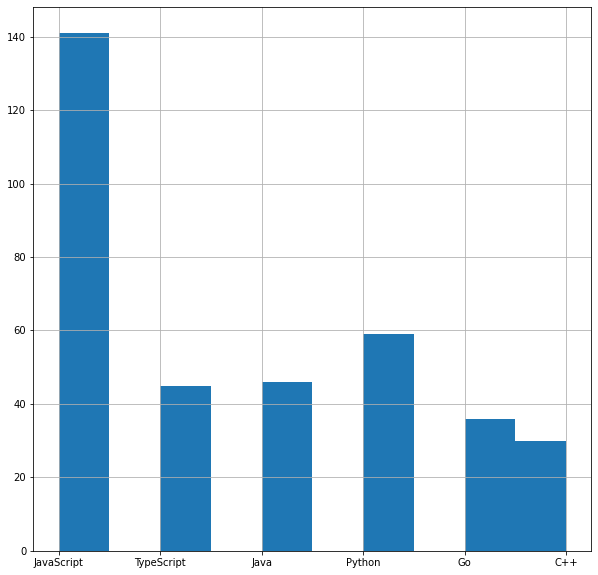

In [10]:
plt.figure(figsize=(10, 10))
data.language.hist(align = 'mid')

In [11]:
data.isna().sum()

repo               0
language           0
readme_contents    0
dtype: int64

In [12]:
data = prep_readme_data(df= data, column = 'readme_contents', extra_words=['https','p','com','http','href'], exclude_words=[])

In [13]:
data = data.drop(columns = ['readme_contents'])

In [27]:
data = get_columns(data)

In [31]:
data

,repo,language,clean,stemmed,lemmatized,message_length,word_count
3,tailwindlabs/tailwindcss,JavaScript,utilityfirst cs framework rapidly building cus...,utilityfirst cs framework rapidli build custom...,utilityfirst c framework rapidly building cust...,549,48
5,github/fetch,JavaScript,windowfetch polyfill fetch function promisebas...,windowfetch polyfil fetch function promisebas ...,windowfetch polyfill fetch function promisebas...,1882,209
7,ianstormtaylor/slate,TypeScript,completely customizable framework building ric...,complet customiz framework build rich text edi...,completely customizable framework building ric...,7461,718
8,Kong/insomnia,JavaScript,insomnia rest client slack channelhttpschatins...,insomnia rest client slack channelhttpschatins...,insomnia rest client slack channelhttpschatins...,3120,311
9,CymChad/BaseRecyclerViewAdapterHelper,Java,httpsuserimagesgithubusercontentcom76982093319...,httpsuserimagesgithubusercontentcom76982093319...,httpsuserimagesgithubusercontentcom76982093319...,2027,74
...,...,...,...,...,...,...,...
551,TheAlgorithms/Java,Java,httpsgithubcomthealgorithmsjavatreedevelopment...,httpsgithubcomthealgorithmsjavatreedevelop jav...,httpsgithubcomthealgorithmsjavatreedevelopment...,4485,243
555,tornadoweb/tornado,Python,tornado web server image httpsbadgesgitterimjo...,tornado web server imag httpsbadgesgitterimjoi...,tornado web server image httpsbadgesgitterimjo...,911,92
557,gulpjs/gulp,JavaScript,streaming build system npm versionnpmimagenpmu...,stream build system npm versionnpmimagenpmurl ...,streaming build system npm versionnpmimagenpmu...,6677,734
558,alibaba/weex,C++,weex framework building mobile crossplatform u...,weex framework build mobil crossplatform ui bu...,weex framework building mobile crossplatform u...,807,43


In [48]:
def is_javascript(row):
    if row['language'] == 'JavaScript':
        return True
    else:
        return False

In [49]:
data['is_javascript'] = data.apply(lambda row: is_javascript(row), axis=1)

In [50]:
data

,repo,language,clean,stemmed,lemmatized,message_length,word_count,is_js,is_javascript
3,tailwindlabs/tailwindcss,JavaScript,utilityfirst cs framework rapidly building cus...,utilityfirst cs framework rapidli build custom...,utilityfirst c framework rapidly building cust...,549,48,JavaScript,True
5,github/fetch,JavaScript,windowfetch polyfill fetch function promisebas...,windowfetch polyfil fetch function promisebas ...,windowfetch polyfill fetch function promisebas...,1882,209,JavaScript,True
7,ianstormtaylor/slate,TypeScript,completely customizable framework building ric...,complet customiz framework build rich text edi...,completely customizable framework building ric...,7461,718,TypeScript,False
8,Kong/insomnia,JavaScript,insomnia rest client slack channelhttpschatins...,insomnia rest client slack channelhttpschatins...,insomnia rest client slack channelhttpschatins...,3120,311,JavaScript,True
9,CymChad/BaseRecyclerViewAdapterHelper,Java,httpsuserimagesgithubusercontentcom76982093319...,httpsuserimagesgithubusercontentcom76982093319...,httpsuserimagesgithubusercontentcom76982093319...,2027,74,Java,False
...,...,...,...,...,...,...,...,...,...
551,TheAlgorithms/Java,Java,httpsgithubcomthealgorithmsjavatreedevelopment...,httpsgithubcomthealgorithmsjavatreedevelop jav...,httpsgithubcomthealgorithmsjavatreedevelopment...,4485,243,Java,False
555,tornadoweb/tornado,Python,tornado web server image httpsbadgesgitterimjo...,tornado web server imag httpsbadgesgitterimjoi...,tornado web server image httpsbadgesgitterimjo...,911,92,Python,False
557,gulpjs/gulp,JavaScript,streaming build system npm versionnpmimagenpmu...,stream build system npm versionnpmimagenpmurl ...,streaming build system npm versionnpmimagenpmu...,6677,734,JavaScript,True
558,alibaba/weex,C++,weex framework building mobile crossplatform u...,weex framework build mobil crossplatform ui bu...,weex framework building mobile crossplatform u...,807,43,C++,False


# Explore 

In [15]:
data.language.value_counts(normalize = True)

JavaScript    0.394958
Python        0.165266
Java          0.128852
TypeScript    0.126050
Go            0.100840
C++           0.084034
Name: language, dtype: float64

In [16]:
data.language.value_counts()

JavaScript    141
Python         59
Java           46
TypeScript     45
Go             36
C++            30
Name: language, dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 3 to 559
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   repo        357 non-null    object
 1   language    357 non-null    object
 2   clean       357 non-null    object
 3   stemmed     357 non-null    object
 4   lemmatized  357 non-null    object
dtypes: object(5)
memory usage: 16.7+ KB


In [18]:
data.describe()

,repo,language,clean,stemmed,lemmatized
count,357,357,357,357,357
unique,357,6,356,356,356
top,swoole/swoole-src,JavaScript,,,
freq,1,141,2,2,2


In [19]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [56]:
# combine all messages in single string by label

JavaScript_words = clean(' '.join(data[data.language == 'JavaScript'].stemmed))
Python_words = clean(' '.join(data[data.language == 'Python'].stemmed))
TS_words = clean(' '.join(data[data.language == 'TypeScript'].stemmed))
Java_words = clean(' '.join(data[data.language == 'Java'].stemmed))
Go_words = clean(' '.join(data[data.language == 'Go'].stemmed))
C_words = clean(' '.join(data[data.language == 'C++'].stemmed))
Non_JavaScript = clean(' '.join(data[data.language != 'JavaScript'].stemmed))
all_words = clean(' '.join(data.stemmed))

In [21]:
# making a df for each language 
js_df = data[data.language == 'JavaScript']
python_df = data[data.language == 'Python']
java_df = data[data.language == 'Java']
ts_df = data[data.language == 'TypeScript']
go_df = data[data.language == 'Go']
c_df = data[data.language == 'C++']

In [23]:
TS_words

'complet customiz framework build rich text editor principl demo exampl document contribut slate let build rich intuit editor like mediumhttpsmediumcom dropbox paperhttpswwwdropboxcompap googl docshttpswwwgooglecomdocsaboutwhich becom tabl stake applic webwithout codebas get mire complex logic implement seri plugin ever constrain core think like pluggabl implement contentedit built top reacthttpsfacebookgithubioreact inspir librari like draftjshttpsfacebookgithubiodraftj prosemirrorhttpprosemirrornet quillhttpquilljscom slate current beta core api useabl right might need pull request improv advanc use case fix bug api final break chang time discov better solut current 10 releas schedul  still get architectur right slate also contributordriven back huge compani mean contribut voluntari done peopl need need someth improv ad fix pleas contribut one want becom activ maintain let know slack channel creat slate well bewar section myhttpsgithubcomianstormtaylor opinion creat slate tri lot ric

In [24]:
TS_freq = pd.Series(TS_words.split()).value_counts()
TS_freq

use                                                                                                        318
const                                                                                                      168
react                                                                                                      131
redux                                                                                                      126
function                                                                                                   121
                                                                                                          ... 
word                                                                                                         1
httpimgbadgesizeiohttpsunpkgcomslatedistslateminjscompressiongziplabel20httpsunpkgcomslatedistslateminj      1
createselectorcreatestructuredselectorinputselectorsselectorcreatorcreateselector                            1
t

In [58]:
#Represent text as word frequencies
JavaScript_freq = pd.Series(JavaScript_words.split()).value_counts()
Python_freq = pd.Series(Python_words.split()).value_counts()
Java_freq = pd.Series(Java_words.split()).value_counts()
Go_freq = pd.Series(Go_words.split()).value_counts()
C_freq = pd.Series(C_words.split()).value_counts()
TS_freq = pd.Series(TS_words.split()).value_counts()
non_JavaScript_freq = pd.Series(Non_JavaScript.split()).value_counts()
all_words_freq = pd.Series(all_words.split()).value_counts()

In [60]:
word_counts = pd.concat([JavaScript_freq, Python_freq, Java_freq, Go_freq, C_freq, TS_freq,non_JavaScript_freq, all_words_freq], axis = 1).fillna(0).astype(int)
word_counts.columns = ['javascript','python','java','go','c','ts','NonJS','all']
word_counts.head()

,javascript,python,java,go,c,ts,NonJS,all
use,1455,857,181,269,312,318,1937,3392
javascript,837,42,3,1,2,58,106,943
code,792,209,94,65,71,77,516,1308
function,790,151,19,43,82,121,416,1206
j,772,7,2,7,48,94,158,930


In [61]:
word_counts.sort_values('all', ascending = False).head(20)

,javascript,python,java,go,c,ts,NonJS,all
use,1455,857,181,269,312,318,1937,3392
file,705,526,54,166,109,38,893,1598
instal,480,568,49,141,125,103,986,1466
code,792,209,94,65,71,77,516,1308
support,478,325,124,99,117,91,756,1234
function,790,151,19,43,82,121,416,1206
project,672,160,97,51,54,92,454,1126
1,353,339,74,113,137,89,752,1105
option,578,360,16,66,27,38,507,1085
run,418,254,89,117,64,86,610,1028


In [64]:
word_counts.sort_values(['NonJS','javascript'],ascending = [True,False]).head(20)

,javascript,python,java,go,c,ts,NonJS,all
takehom,353,0,0,0,0,0,0,353
onsit,277,0,0,0,0,0,0,277
usa,188,0,0,0,0,0,0,188
uk,159,0,0,0,0,0,0,159
nightmar,120,0,0,0,0,0,0,120
ccxt,119,0,0,0,0,0,0,119
san,118,0,0,0,0,0,0,118
autoprefix,108,0,0,0,0,0,0,108
london,103,0,0,0,0,0,0,103
est,99,0,0,0,0,0,0,99


In [65]:
word_counts.sort_values(['javascript','NonJS'],ascending = [True,False]).head(20)

,javascript,python,java,go,c,ts,NonJS,all
softwareoss,0,750,0,0,0,0,750,750
py,0,253,0,0,0,0,253,253
ycm,0,201,0,0,0,0,201,201
cpp,0,27,0,0,93,0,120,120
cmake,0,21,0,0,60,0,81,81
viper,0,0,0,81,0,0,81,81
viml,0,79,0,0,0,0,79,79
filetyp,0,70,0,3,0,4,77,77
struct,0,0,0,24,49,0,73,73
airflow,0,71,0,0,0,0,71,71


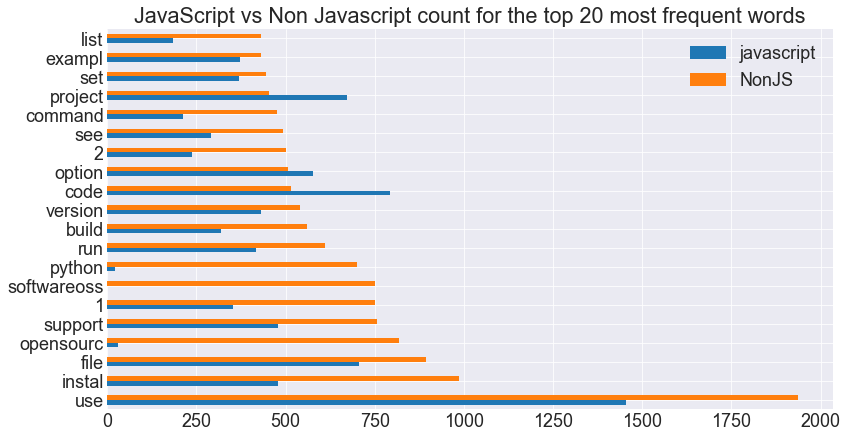

In [93]:
plt.rc('font', size=18)
word_counts.sort_values('NonJS', ascending=False).head(20)[['javascript','NonJS']].plot.barh()
plt.title('JavaScript vs Non Javascript count for the top 20 most frequent words')
plt.show()

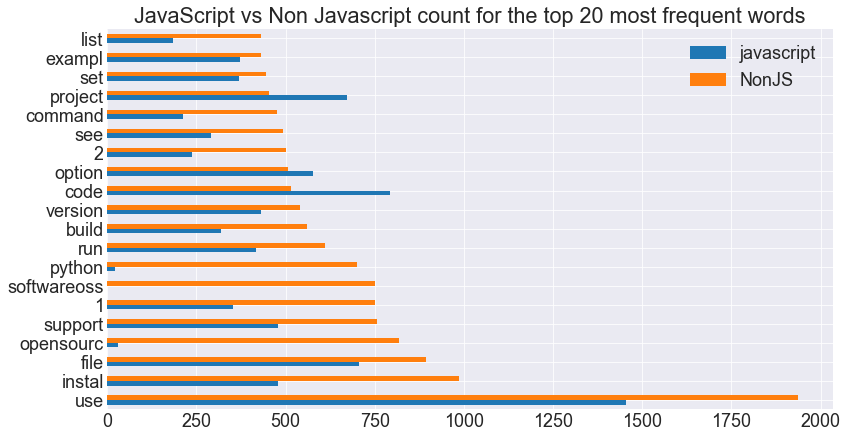

In [91]:
plt.rc('font', size=18)
word_counts.sort_values('NonJS', ascending=False).head(20)[['javascript','NonJS']].plot.barh()
plt.title('JavaScript vs Non Javascript count for the top 20 most frequent words')
plt.show()

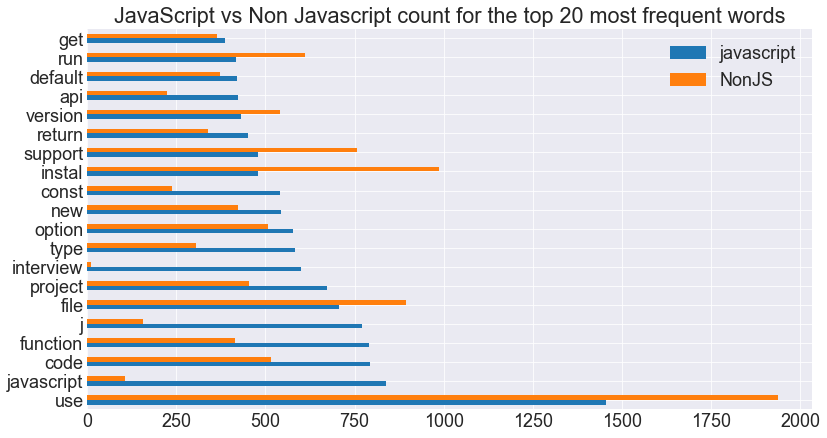

In [90]:
plt.rc('font', size=18)
word_counts.sort_values('javascript', ascending=False).head(20)[['javascript','NonJS']].plot.barh()
plt.title('JavaScript vs Non Javascript count for the top 20 most frequent words')
plt.show()

<Figure size 1152x648 with 0 Axes>

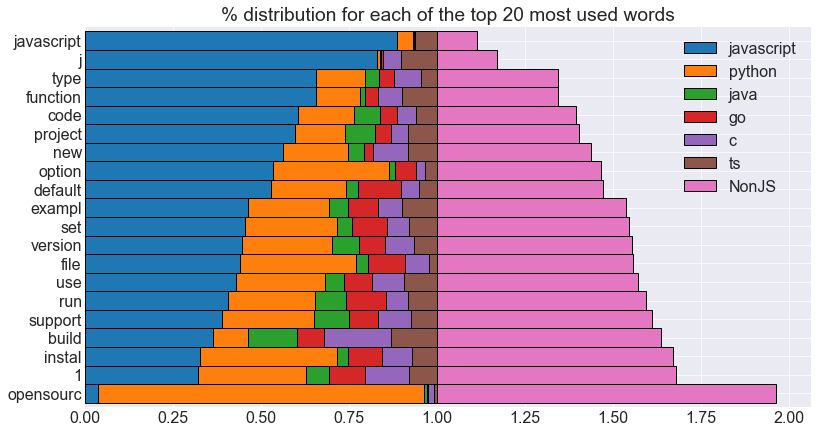

In [77]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=16)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'javascript')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('% distribution for each of the top 20 most used words')
plt.show()

Text(0.5, 1.0, 'Top 10 most common spam bigrams')

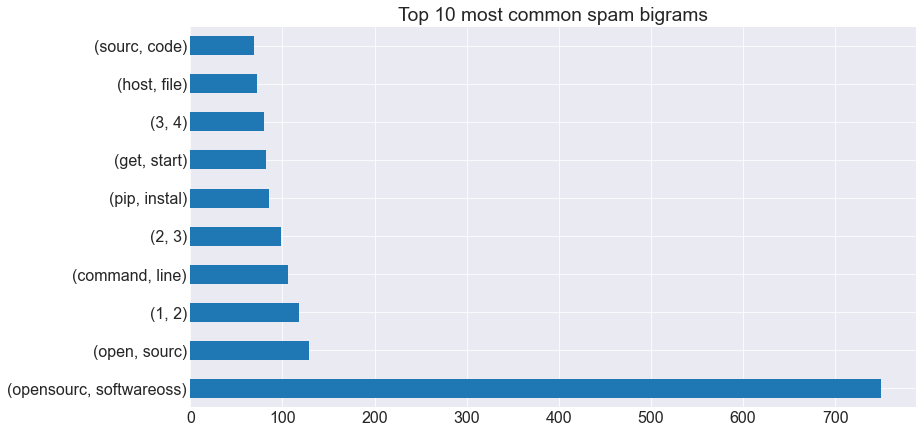

In [82]:
pd.Series(nltk.bigrams(Non_JavaScript.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Non JavaScript bigrams')

Text(0.5, 1.0, 'Top 10 most common spam bigrams')

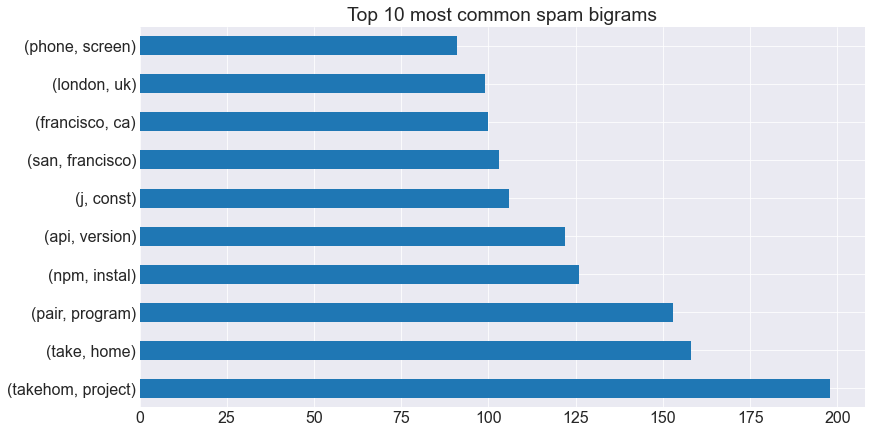

In [78]:
pd.Series(nltk.bigrams(JavaScript_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common JavaScript bigrams')

Text(0.5, 1.0, 'Top 10 most common spam bigrams')

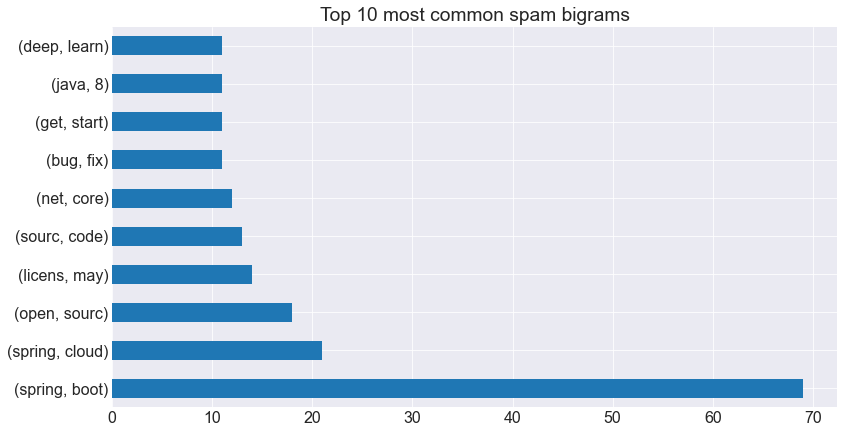

In [84]:
pd.Series(nltk.bigrams(Java_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Java bigrams')

Text(0.5, 1.0, 'Top 10 most common spam bigrams')

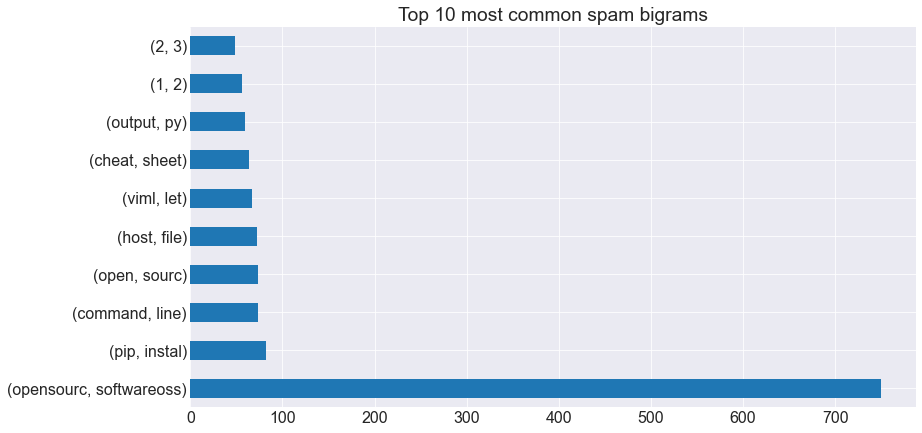

In [83]:
pd.Series(nltk.bigrams(Python_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Python bigrams')

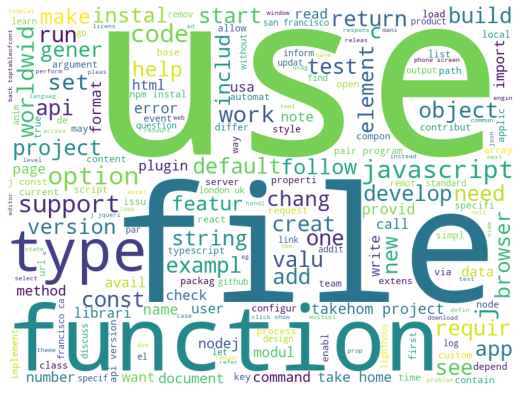

In [94]:
img = WordCloud(background_color='white', width=800, height=600).generate(JavaScript_words)
plt.imshow(img)
plt.axis('off')
plt.show()

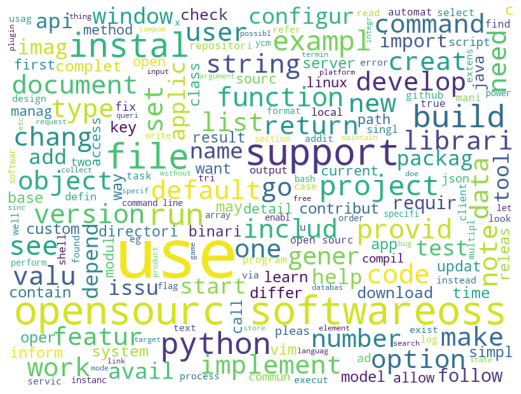

In [95]:
img = WordCloud(background_color='white', width=800, height=600).generate(Non_JavaScript)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# Might decide to return to prepare to take out 'use'

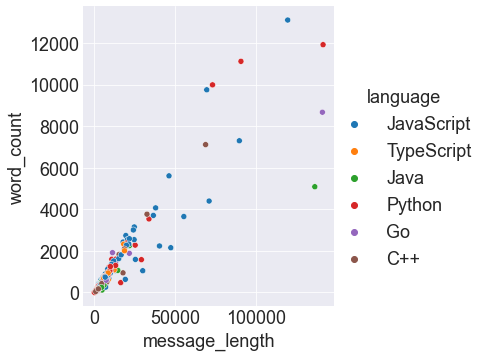

In [99]:
sns.relplot(data = data, x = 'message_length', y = 'word_count', hue = 'language')